In [618]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
from sklearn import metrics
import numpy as np # linear algebra
import pandas as pd # data processing
#from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from scipy import stats

In [619]:
df_train=pd.read_csv('../reto_data/inputs/measurements.csv')
df_train.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


### drop nan

In [620]:
df_train.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [621]:
set('df_refill liters')

{' ', '_', 'd', 'e', 'f', 'i', 'l', 'r', 's', 't'}

In [622]:
set('df_refill gas')

{' ', '_', 'a', 'd', 'e', 'f', 'g', 'i', 'l', 'r', 's'}

In [623]:
#eliminamos columnas con demasiados elementos vacios
df_train=df_train.drop(['specials', 'refill liters', 'refill gas'], axis='columns')

In [624]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


### Categorical and numerical columns

In [625]:
num_cols = list(df_train._get_numeric_data().columns)
print("Numerical columns: ", num_cols)

cat_cols=list(set(df_train.columns) - set(num_cols))
print("Categorical columns: ", cat_cols)

Numerical columns:  ['speed', 'temp_outside', 'AC', 'rain', 'sun']
Categorical columns:  ['temp_inside', 'gas_type', 'distance', 'consume']


In [626]:
#Creating a function to convert the values
def comma_converter(x):
    if type(x) == str and ',' in x:
        a = x.split(',')
        return float(a[0] + '.' + a[1])
    else:
        return float(x)
    
#Converting the data
df_train['distance'] = df_train['distance'].apply(comma_converter)
df_train['consume'] = df_train['consume'].apply(comma_converter)
df_train['temp_inside'] = df_train['temp_inside'].apply(comma_converter)

In [627]:
#visualizar contenido de las columnas categoricas
for c in cat_cols:
    print(c, ">", set(df_train[c]))
    print("")

temp_inside > {nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 19.0, 20.0, 21.5, 22.5, 21.0, 20.5, 23.0, 23.5, 24.0, 22.0, 25.0, 24.5, 25.5}

gas_type > {'SP98', 'E10'}

distance > {1.7, 2.0, 2.9, 4.9, 4.5, 5.4, 7.8, 8.3, 6.1, 10.2, 11.2, 12.0, 12.9, 12.3, 11.9, 12.4, 11.8, 18.5, 17.3, 14.2, 17.9, 18.4, 18.3, 24.7, 25.9, 25.3, 19.0, 28.0, 20.0, 27.3, 31.1, 32.6, 33.4, 34.8, 35.9, 7.0, 36.9, 36.6, 39.4, 35.8, 40.6, 38.6, 43.5, 44.9, 44.4, 43.7, 39.0, 48.6, 41.9, 10.5, 51.6, 53.2, 56.1, 11.5, 58.7, 12.5, 13.0, 67.2, 14.0, 14.5, 16.0, 16.6, 16.1, 16.4, 81.2, 17.4, 16.9, 17.0, 16.5, 18.9, 18.1, 93.9, 19.6, 100.9, 20.1, 101.9, 20.6, 20.9, 21.6, 21.1, 2.4, 21.4, 21.5, 22.9, 22.4, 22.1, 21.0, 23.5, 24.9, 24.5, 25.5, 129.7, 130.3, 26.6, 5.5, 27.1, 28.5, 29.0, 29.9, 153.5, 31.4, 31.5, 31.9, 6.4, 6.0, 162.7, 32.1, 7.9, 7.4, 32.0, 9.9, 36.5, 37.2, 38.5, 13.9, 13.4, 39.5, 15.9, 15.4, 211.0, 4.8, 1.3, 216.1, 5.3, 6.8, 8.7, 9.8, 9.7, 9.2, 10.8, 11.7, 11.3, 12.2, 12.8, 12.7, 13.2, 13.3, 1

In [628]:
#convertimos en numéricas las que no son strings
df_train['temp_inside'] = pd.to_numeric(df_train['temp_inside'], errors='coerce')
df_train['consume'] = pd.to_numeric(df_train['consume'], errors='coerce')
df_train['distance'] = pd.to_numeric(df_train['distance'], errors='coerce')

In [629]:
num_cols = list(df_train._get_numeric_data().columns)
print("Numerical columns: ", num_cols)

cat_cols=list(set(df_train.columns) - set(num_cols))
print("Categorical columns: ", cat_cols)

Numerical columns:  ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun']
Categorical columns:  ['gas_type']


In [630]:
#con un diccionario mapeamos y convertimos en numéricos los dos tipos de combustibles
df_train['gas_type'] = df_train['gas_type'].map({'SP98': 1, 'E10': 0})
set(df_train['gas_type'])

{0, 1}

In [631]:
#solo una pequeá cantidad de rows en temp_inside están vacías, las rellenamos con la media de la columna
temp_inside = df_train['temp_inside'].dropna()
temp_inside_avg = temp_inside.mean()
df_train['temp_inside'] = df_train['temp_inside'].fillna(temp_inside_avg)

In [632]:
distance = df_train['distance'].dropna()
distance_avg = distance.mean()
df_train['distance'] = df_train['distance'].fillna(distance_avg)

In [633]:
#df_train.drop(['distance'], inplace=True, axis=1)

In [634]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    int64  
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 27.4 KB


### Añadimos una nueva columna con el consumo / 100 Km

In [635]:
df_train['consume_100Km'] = (df_train['consume']/100)*df_train['distance']

In [636]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   gas_type       388 non-null    int64  
 6   AC             388 non-null    int64  
 7   rain           388 non-null    int64  
 8   sun            388 non-null    int64  
 9   consume_100Km  388 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 30.4 KB


### correlations

(10.5, -0.5)

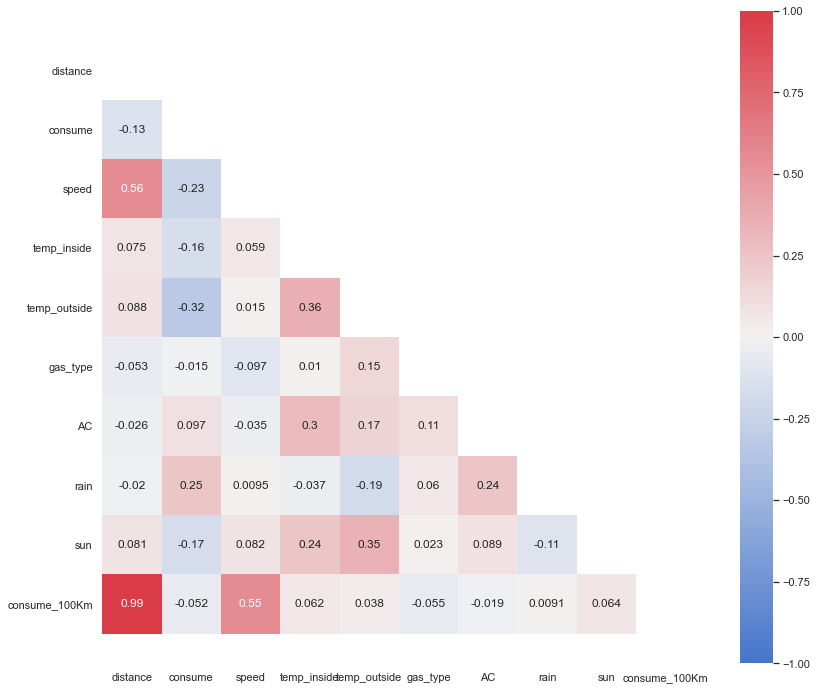

In [637]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(16,12))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(df_train.corr(), mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [638]:
corr = (df_train.corr().sort_values('consume_100Km', ascending=False))*100
corr

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume_100Km
consume_100Km,99.210074,-5.218780,55.184655,6.237325,3.787710,-5.534834,-1.870021,0.912464,6.424729,100.000000
distance,100.000000,-12.896676,56.229882,7.517823,8.817534,-5.341141,-2.573817,-1.979065,8.111981,99.210074
speed,56.229882,-22.786618,100.000000,5.929296,1.541101,-9.736041,-3.540800,0.948946,8.161828,55.184655
sun,8.111981,-17.066738,8.161828,24.224794,34.690341,2.276096,8.859801,-11.264999,100.000000,6.424729
temp_inside,7.517823,-16.062288,5.929296,100.000000,35.950042,1.019767,29.737625,-3.693724,24.224794,6.237325
temp_outside,8.817534,-32.081059,1.541101,35.950042,100.000000,14.870501,16.756227,-18.631489,34.690341,3.787710
rain,-1.979065,24.811771,0.948946,-3.693724,-18.631489,6.032819,24.291471,100.000000,-11.264999,0.912464
AC,-2.573817,9.659140,-3.540800,29.737625,16.756227,10.528540,100.000000,24.291471,8.859801,-1.870021
consume,-12.896676,100.000000,-22.786618,-16.062288,-32.081059,-1.532697,9.659140,24.811771,-17.066738,-5.218780
gas_type,-5.341141,-1.532697,-9.736041,1.019767,14.870501,100.000000,10.528540,6.032819,2.276096,-5.534834


 *- El consumo no solo se relaciona con el tipo de combustible, sino con la lluvia y la velocidad, así como la temperatura en el exterior y en el interior*

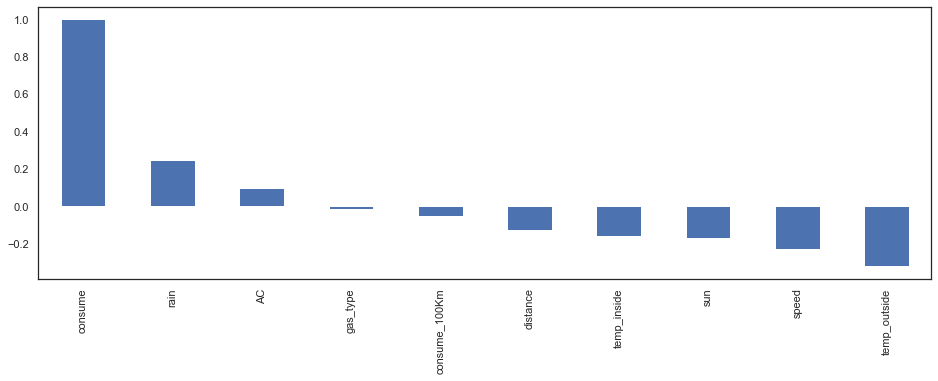

In [639]:
corr_mat=df_train.corr(method='pearson')
plt.figure(figsize = (16,5))
corr_mat['consume'].sort_values(ascending = False).plot(kind = 'bar');

### Chequear media de consumo por tipo de combustible y resto de variables

In [640]:
gas_type=df_train.groupby('gas_type')

In [641]:
gas_type.mean()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,consume_100Km
gas_type,,,,,,,,,
0,21.096250,4.931250,43.506250,21.917429,10.11875,0.043750,0.100000,0.075000,1.008933
1,18.639912,4.899123,40.820175,21.938007,12.22807,0.100877,0.140351,0.087719,0.883618


In [504]:
#gas_type.get_group(1).mean()

In [505]:
#gas_type.get_group(0).mean()

<AxesSubplot:ylabel='gas_type'>

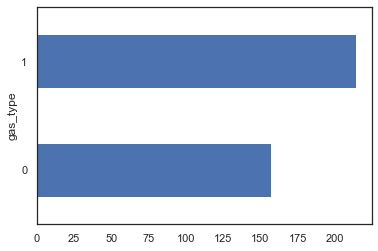

In [506]:
gas_type.size().sort_values(ascending=True).plot(kind='barh')
#'SP98': 1, 'E10': 0

Text(11.204923406862736, 0.5, 'consume l/100km')

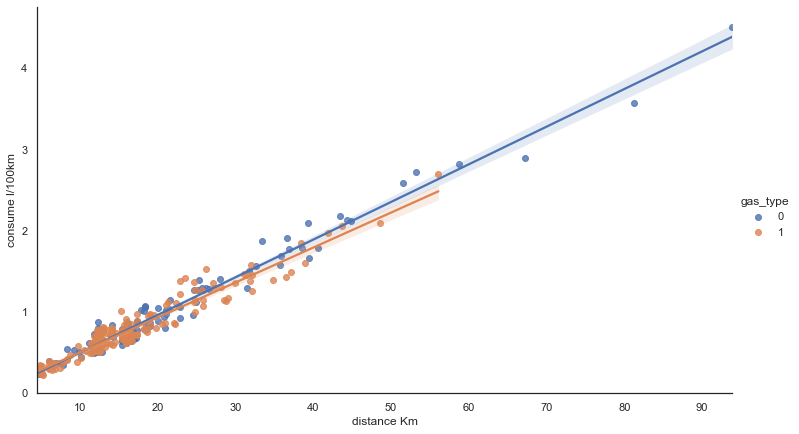

In [612]:
#Consume vs Km_absolute
sns.lmplot(data = df_train, x = 'distance', y = 'consume_100Km', hue = 'gas_type', height=6,aspect=1.7)
plt.xlabel('distance Km')
plt.ylabel('consume l/100km')

In [512]:
#gas_type[['consume_100Km','speed',]].mean().plot(kind='bar')
#'SP98': 1, 'E10': 0

In [513]:
#gas_type.agg({'consume_100Km':'min','speed':'max',}).plot(kind='bar')
#'SP98': 1, 'E10': 0

In [516]:
gas_type.agg({'consume_100Km':'max','speed':'max','distance':'max' })

,consume_100Km,speed,distance
gas_type,,,
0,5.9938,88,130.3
1,2.6928,82,56.1


In [515]:
gas_type.agg({'consume_100Km':'min','speed':'min', 'distance':'min',})

,consume_100Km,speed,distance
gas_type,,,
0,0.1638,16,4.1
1,0.2035,16,2.9


In [517]:
gas_type.agg({'consume_100Km':'mean','speed':'mean','distance':'mean' })

,consume_100Km,speed,distance
gas_type,,,
0,1.025246,43.980892,21.463057
1,0.748552,40.602804,15.987383


In [518]:
gas_type.agg(['min', 'max','mean']).T

gas_type                     0          1
distance      min     4.100000   2.900000
              max   130.300000  56.100000
              mean   21.463057  15.987383
consume       min     3.700000   3.700000
              max     8.100000   8.700000
              mean    4.866879   4.814019
speed         min    16.000000  16.000000
              max    88.000000  82.000000
              mean   43.980892  40.602804
temp_inside   min    21.000000  19.000000
              max    25.000000  25.500000
              mean   21.912666  21.978344
temp_outside  min    -5.000000  -3.000000
              max    27.000000  31.000000
              mean   10.070064  12.233645
AC            min     0.000000   0.000000
              max     1.000000   1.000000
              mean    0.044586   0.102804
rain          min     0.000000   0.000000
              max     1.000000   1.000000
              mean    0.095541   0.140187
sun           min     0.000000   0.000000
              max     1.000000   1.000000
              mean    0.076433   0.084112
consume_100Km min     0.163800   0.203500
              max     5.993800   2.692800
              mean    1.025246   0.748552

In [519]:
df_max_speed=df_train[df_train.speed == df_train['speed'].max()]
df_max_speed

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume_100Km
273,93.9,4.8,88,23.0,18,0,1,0,1,4.5072


In [520]:
df_min_speed=df_train[df_train.speed == df_train['speed'].min()]
df_min_speed

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume_100Km
245,11.8,6.1,16,22.5,6,0,0,1,0,0.7198
373,15.3,6.6,16,24.0,27,1,1,0,0,1.0098


In [522]:
group_cols = ['gas_type']
agg_dict = {'speed':['min', 'max','mean','var'],
            'distance':['min', 'max','mean','var'],
            'consume_100Km':['min', 'max','mean','var']}
df_groupby=df_train.groupby(group_cols).agg(agg_dict)

In [523]:
level0 = df_groupby.columns.get_level_values(0)
level0

Index(['speed', 'speed', 'speed', 'speed', 'distance', 'distance', 'distance',
       'distance', 'consume_100Km', 'consume_100Km', 'consume_100Km',
       'consume_100Km'],
      dtype='object')

In [524]:
level1 = df_groupby.columns.get_level_values(1)
level1

Index(['min', 'max', 'mean', 'var', 'min', 'max', 'mean', 'var', 'min', 'max',
       'mean', 'var'],
      dtype='object')

In [525]:
df_groupby.columns = level0 + '_' + level1

In [526]:
df_groupby.T

gas_type,0,1
speed_min,16.000000,16.000000
speed_max,88.000000,82.000000
speed_mean,43.980892,40.602804
speed_var,189.685530,143.151354
distance_min,4.100000,2.900000
distance_max,130.300000,56.100000
distance_mean,21.463057,15.987383
distance_var,413.091960,68.495192
consume_100Km_min,0.163800,0.203500
consume_100Km_max,5.993800,2.692800


### speed outliers

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


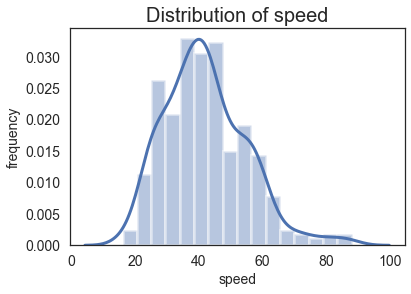

In [527]:
# histogram and kernel density estimation function of the variable height
ax = sns.distplot(df_train.speed, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('speed', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution of speed', fontsize=20);

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of speed')

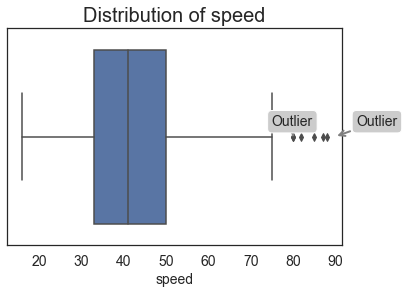

In [528]:
# box plot of the variable consume
ax = sns.boxplot(df_train.speed)

# notation indicating an outlier
ax.annotate('Outlier', xy=(80,0), xytext=(75,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
ax.annotate('Outlier', xy=(90,0), xytext=(95,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('speed', fontsize=14)
plt.title('Distribution of speed', fontsize=20)

### consume outliers

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


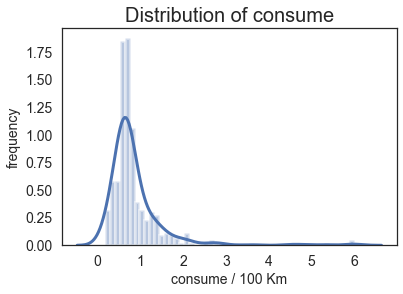

In [529]:
# histogram and kernel density estimation function of the variable consume
ax = sns.distplot(df_train.consume_100Km, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('consume / 100 Km', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution of consume', fontsize=20);

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of consume')

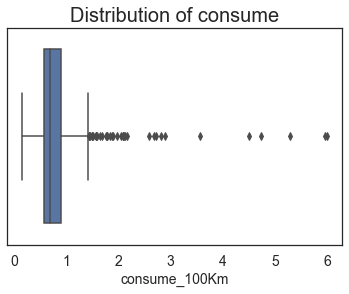

In [530]:
# box plot of the variable consume
ax = sns.boxplot(df_train.consume_100Km)

# notation indicating an outlier
ax.annotate('Outlier', xy=(9,0), xytext=(8,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('consume_100Km', fontsize=14)
plt.title('Distribution of consume', fontsize=20)

In [531]:
q_low = df_train["consume"].quantile(0.01)
q_hi = df_train["consume"].quantile(0.99)

df_train = df_train[(df_train["consume"] < q_hi) & (df_train["consume"] > q_low)]

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


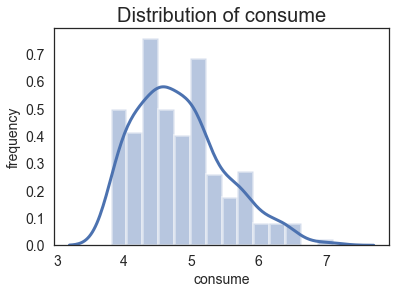

In [532]:
# histogram and kernel density estimation function of the variable consume
ax = sns.distplot(df_train.consume, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('consume', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution of consume', fontsize=20);

### distance outliers

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


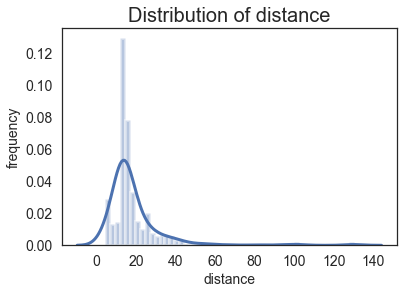

In [533]:
# histogram and kernel density estimation function of the variable consume
ax = sns.distplot(df_train.distance, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('distance', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution of distance', fontsize=20);

In [617]:
# box plot of the variable consume
ax = sns.boxplot(df_train.distance)

# notation indicating an outlier
ax.annotate('Outlier', xy=(9,0), xytext=(8,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('distance', fontsize=14)
plt.title('Distribution of distance', fontsize=20)

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

In [535]:
q_low = df_train["distance"].quantile(0.01)
q_hi = df_train["distance"].quantile(0.99)

df_train = df_train[(df_train["distance"] < q_hi) & (df_train["distance"] > q_low)]

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


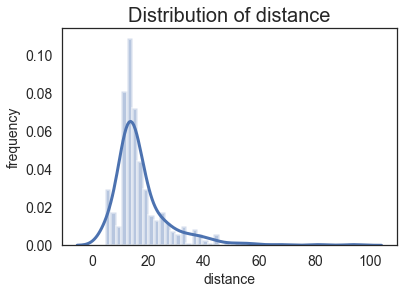

In [536]:
# histogram and kernel density estimation function of the variable consume
ax = sns.distplot(df_train.distance, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('distance', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution of distance', fontsize=20);

In [537]:
corr = (df_train.corr().sort_values('consume', ascending=False))*100
corr

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume_100Km
consume,-19.328871,100.000000,-10.660054,-14.960494,-40.515699,-3.317682,4.542825,27.351497,-19.047784,-0.639884
rain,-4.111819,27.351497,2.659649,-2.075481,-17.197077,5.746854,20.559670,100.000000,-10.998422,2.075743
AC,2.896457,4.542825,-1.100556,35.051096,20.572996,9.916979,100.000000,20.559670,11.188064,4.206289
consume_100Km,97.784761,-0.639884,47.215599,1.415629,-2.614758,-17.257073,4.206289,2.075743,3.747622,100.000000
gas_type,-15.443003,-3.317682,-10.246655,2.611744,17.052824,100.000000,9.916979,5.746854,0.473920,-17.257073
speed,47.216761,-10.660054,100.000000,3.985971,-0.453907,-10.246655,-1.100556,2.659649,9.603277,47.215599
temp_inside,4.069561,-14.960494,3.985971,100.000000,35.439341,2.611744,35.051096,-2.075481,23.173143,1.415629
sun,8.265346,-19.047784,9.603277,23.173143,31.315166,0.473920,11.188064,-10.998422,100.000000,3.747622
distance,100.000000,-19.328871,47.216761,4.069561,6.752227,-15.443003,2.896457,-4.111819,8.265346,97.784761
temp_outside,6.752227,-40.515699,-0.453907,35.439341,100.000000,17.052824,20.572996,-17.197077,31.315166,-2.614758


(10.5, -0.5)

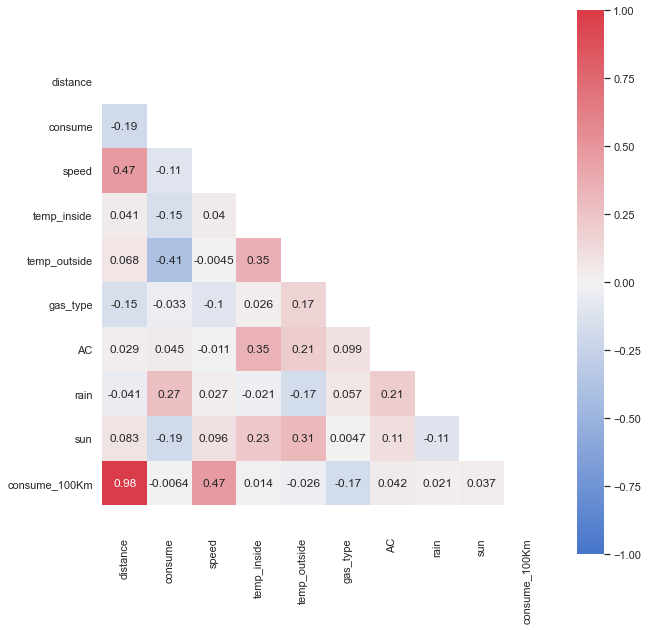

In [538]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(10,10))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(df_train.corr(), mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

### Feature selection.2

In [540]:
X = df_train[['speed', 'temp_inside','distance','consume', 'temp_outside',
       'gas_type', 'AC', 'rain', 'sun']].values
y = df_train['consume_100Km'].values

In [541]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=9, train_size = 0.8)

## Models pipelines

In [542]:

# We train different model to see which give us less error
models = { "ridge": Ridge(),
          "lasso": Lasso(),
          "sgd": SGDRegressor(),
          "knn": KNeighborsRegressor(),
          "gradient": GradientBoostingRegressor(),
          "rdm": RandomForestRegressor(),}

In [543]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])

pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

pipeline_ridge=Pipeline([("scalar6",StandardScaler()),
                     ("rf_classifier",Ridge())])

pipeline_lasso=Pipeline([("scalar7",StandardScaler()),
                     ("rf_classifier",Lasso())])

pipeline_xgbr=Pipeline([("scalar8",StandardScaler()),
                     ("rf_classifier",GradientBoostingRegressor())])

In [544]:
# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, 
             pipeline_xgb, pipeline_ridge,pipeline_lasso, pipeline_xgbr]

In [545]:
# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",
             3: "KNeighbors", 4: "XGBRegressor", 5:"Ridge", 6:"Lasso",
            7:'GradientBoostingRegressor'}

In [546]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [547]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -0.047035 
DecisionTree: -0.093148 
RandomForest: -0.084951 
KNeighbors: -0.231354 
XGBRegressor: -0.072891 
Ridge: -0.047132 
Lasso: -0.504632 
GradientBoostingRegressor: -0.066258 


In [548]:
for i, model in enumerate(pipelines):
    pred = model.predict(X_train)
    print(pipelines[i],"R^2:",metrics.r2_score(y_train, pred))
    print("Adjusted R^2:",1 - (1-metrics.r2_score(y_train, pred))*(len(y_train)-1)/(len(y_train)-X_test.shape[1]-1))
    print("MAE:",metrics.mean_absolute_error(y_train, pred))
    print("MSE:",metrics.mean_squared_error(y_train, pred))
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, pred)))

Pipeline(steps=[('scalar1', StandardScaler()),
                ('lr_classifier', LinearRegression())]) R^2: 0.9925376978865574
Adjusted R^2: 0.9922880297861076
MAE: 0.02837607364261138
MSE: 0.0020482755913549078
RMSE: 0.04525787877657224
Pipeline(steps=[('scalar2', StandardScaler()),
                ('dt_classifier', DecisionTreeRegressor())]) R^2: 1.0
Adjusted R^2: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0
Pipeline(steps=[('scalar3', StandardScaler()),
                ('rf_classifier', RandomForestRegressor())]) R^2: 0.9937861379766549
Adjusted R^2: 0.9935782392472493
MAE: 0.014543322580645234
MSE: 0.001705599923050192
RMSE: 0.041298909465628655
Pipeline(steps=[('scalar4', StandardScaler()),
                ('rf_classifier', KNeighborsRegressor())]) R^2: 0.8836213486911326
Adjusted R^2: 0.8797276391677876
MAE: 0.11585992831541216
MSE: 0.031943969462365586
RMSE: 0.17872875947190364
Pipeline(steps=[('scalar5', StandardScaler()),
                ('rf_classifier',
                 XGBRegressor(base

In [549]:
# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, 
             pipeline_xgb, pipeline_ridge,pipeline_lasso, pipeline_xgbr]

### pipeline ridge

In [550]:
pred = pipeline_ridge.predict(X_train)
print(pipelines[i],"R^2:",metrics.r2_score(y_train, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_train, pred))*(len(y_train)-1)/(len(y_train)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_train, pred))
print("MSE:",metrics.mean_squared_error(y_train, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, pred)))

Pipeline(steps=[('scalar8', StandardScaler()),
                ('rf_classifier', GradientBoostingRegressor())]) R^2: 0.9925190981140424
Adjusted R^2: 0.9922688077163709
MAE: 0.028603398575988363
MSE: 0.002053380914011125
RMSE: 0.04531424625888778


In [551]:
results_ridge = pd.DataFrame(zip( y_train, pred, y_train - pred), columns = [ 'y_train','y_pred_train', 'error'])
results_ridge.head(10)

,y_train,y_pred_train,error
0,1.2915,1.359248,-0.067748
1,0.6519,0.659642,-0.007742
2,0.8360,0.824696,0.011304
3,0.7093,0.673365,0.035935
4,0.5664,0.559690,0.006710
5,0.3381,0.518197,-0.180097
6,0.7995,0.832087,-0.032587
7,0.4067,0.381400,0.025300
8,1.0128,1.004531,0.008269
9,0.3034,0.227774,0.075626


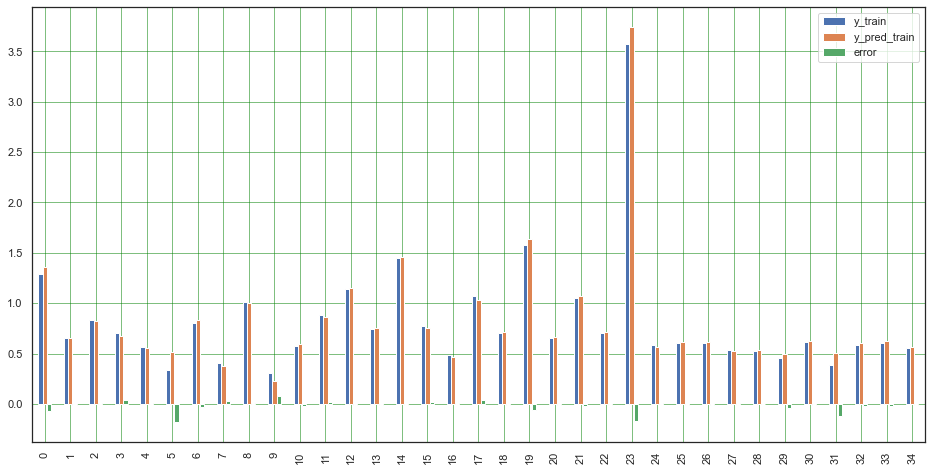

In [552]:
results_ridge = results_ridge.head(35)
results_ridge.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [553]:
pred_final = pipeline_ridge.predict(X_test)

In [554]:
meanerror_ridge=np.mean(results_ridge.error)
meanerror_ridge

-0.01688220269864965

In [555]:
df_pred = pd.DataFrame({'consume': pred_final})
df_pred['id'] = df_pred.index
df_pred=df_pred.set_index('id')
df_pred

,consume
id,
0,0.644335
1,0.555178
2,1.229197
3,0.663718
4,0.515901
...,...
65,0.774879
66,0.671756
67,1.801921


In [556]:
df_pred.to_csv('../reto_data/outputs/ridge.csv')

### pipeline rf

In [557]:
pred = pipeline_rf.predict(X_train)
print(pipelines[i],"R^2:",metrics.r2_score(y_train, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_train, pred))*(len(y_train)-1)/(len(y_train)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_train, pred))
print("MSE:",metrics.mean_squared_error(y_train, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, pred)))

Pipeline(steps=[('scalar8', StandardScaler()),
                ('rf_classifier', GradientBoostingRegressor())]) R^2: 0.9937861379766549
Adjusted R^2: 0.9935782392472493
MAE: 0.014543322580645234
MSE: 0.001705599923050192
RMSE: 0.041298909465628655


In [558]:
results_rf = pd.DataFrame(zip( y_train, pred, y_train - pred), columns = [ 'y_train','y_pred_train', 'error'])
results_rf.head(10)

,y_train,y_pred_train,error
0,1.2915,1.319827,-0.028327
1,0.6519,0.649825,0.002075
2,0.8360,0.838836,-0.002836
3,0.7093,0.733131,-0.023831
4,0.5664,0.571842,-0.005442
5,0.3381,0.322280,0.015820
6,0.7995,0.779141,0.020359
7,0.4067,0.412124,-0.005424
8,1.0128,1.012636,0.000164
9,0.3034,0.311385,-0.007985


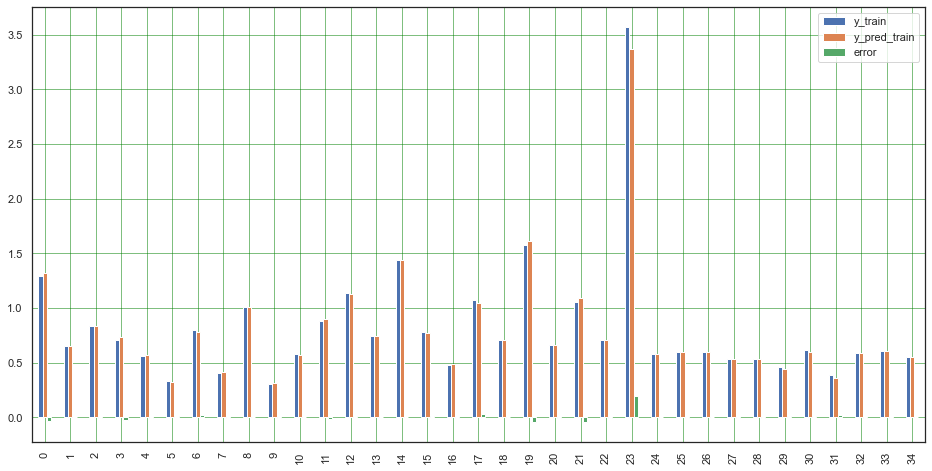

In [559]:
results_rf = results_rf.head(35)
results_rf.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [560]:
pred_final = pipeline_rf.predict(X_test)

In [561]:
meanerror_rf=np.mean(results_rf.error)
meanerror_rf

0.005028800000000358

In [562]:
df_pred = pd.DataFrame({'consume': pred_final})
df_pred['id'] = df_pred.index
df_pred=df_pred.set_index('id')
df_pred

,consume
id,
0,0.653364
1,0.551886
2,1.187203
3,0.699820
4,0.524007
...,...
65,0.745894
66,0.655365
67,1.835191


In [563]:
df_pred.to_csv('../rf.csv')

### pipeline kn

In [564]:
pred = pipeline_kn.predict(X_train)
print(pipelines[i],"R^2:",metrics.r2_score(y_train, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_train, pred))*(len(y_train)-1)/(len(y_train)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_train, pred))
print("MSE:",metrics.mean_squared_error(y_train, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, pred)))

Pipeline(steps=[('scalar8', StandardScaler()),
                ('rf_classifier', GradientBoostingRegressor())]) R^2: 0.8836213486911326
Adjusted R^2: 0.8797276391677876
MAE: 0.11585992831541216
MSE: 0.031943969462365586
RMSE: 0.17872875947190364


In [565]:
results_kn = pd.DataFrame(zip( y_train, pred, y_train - pred), columns = [ 'y_train','y_pred_train', 'error'])
results_kn.head(10)

,y_train,y_pred_train,error
0,1.2915,0.95976,0.33174
1,0.6519,0.65038,0.00152
2,0.8360,0.84794,-0.01194
3,0.7093,0.42464,0.28466
4,0.5664,0.61854,-0.05214
5,0.3381,0.72774,-0.38964
6,0.7995,0.70648,0.09302
7,0.4067,0.47320,-0.06650
8,1.0128,1.15570,-0.14290
9,0.3034,0.42464,-0.12124


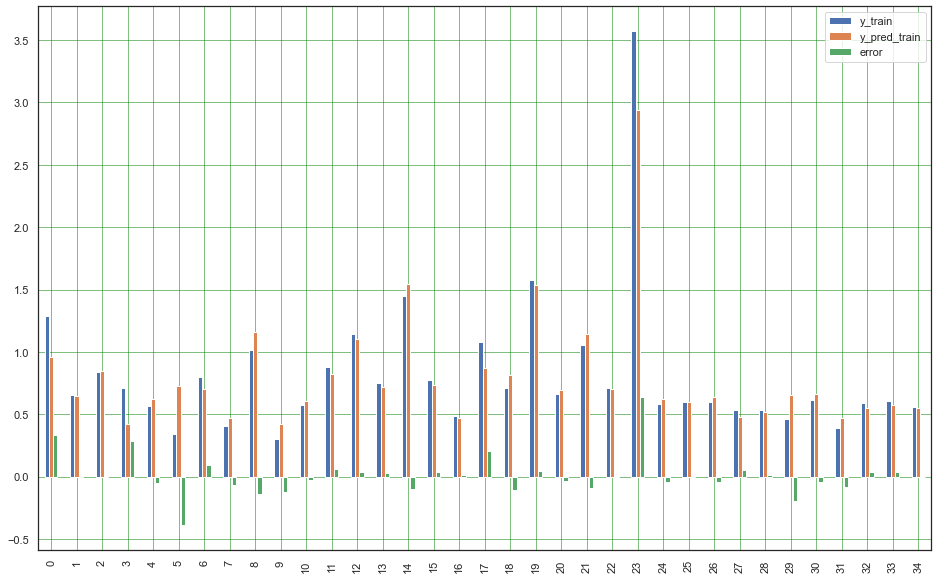

In [566]:
results_kn = results_kn.head(35)
results_kn.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [567]:
pred_final = pipeline_kn.predict(X_test)

In [568]:
meanerror_kn=np.mean(results_kn.error)
meanerror_kn

0.011010857142857142

In [569]:
df_pred = pd.DataFrame({'consume': pred_final})
df_pred['id'] = df_pred.index
df_pred=df_pred.set_index('id')
df_pred

,consume
id,
0,0.62584
1,0.67650
2,0.71324
3,0.79172
4,0.54562
...,...
65,0.79428
66,0.60598
67,1.48028


In [570]:
df_pred.to_csv('../reto_data/outputs/kn.csv')

### pipeline xgb

In [571]:
pred = pipeline_xgb.predict(X_train)
print(pipelines[i],"R^2:",metrics.r2_score(y_train, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_train, pred))*(len(y_train)-1)/(len(y_train)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_train, pred))
print("MSE:",metrics.mean_squared_error(y_train, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, pred)))

Pipeline(steps=[('scalar8', StandardScaler()),
                ('rf_classifier', GradientBoostingRegressor())]) R^2: 0.9999916674769973
Adjusted R^2: 0.9999913886936999
MAE: 0.0010687737832359861
MSE: 2.2871364923928635e-06
RMSE: 0.001512328169542862


In [572]:
results_xgb = pd.DataFrame(zip( y_train, pred, y_train - pred), columns = [ 'y_train','y_pred_train', 'error'])
results_xgb.head(10)

,y_train,y_pred_train,error
0,1.2915,1.291056,0.000444
1,0.6519,0.648607,0.003293
2,0.8360,0.836601,-0.000601
3,0.7093,0.709783,-0.000483
4,0.5664,0.567276,-0.000876
5,0.3381,0.338006,0.000094
6,0.7995,0.799058,0.000442
7,0.4067,0.407544,-0.000844
8,1.0128,1.013486,-0.000686
9,0.3034,0.303199,0.000201


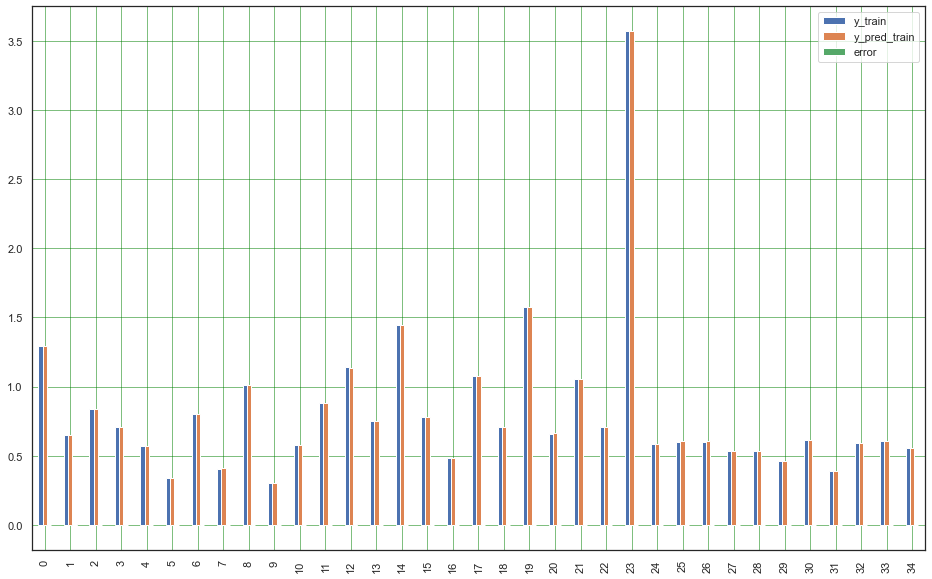

In [573]:
results_xgb = results_xgb.head(35)
results_xgb.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [574]:
pred_final = pipeline_xgb.predict(X_test)

In [575]:
meanerror_xgb=np.mean(results_xgb.error)
meanerror_xgb

-0.0002484967735835318

In [576]:
df_pred = pd.DataFrame({'consume': pred_final})
df_pred['id'] = df_pred.index
df_pred=df_pred.set_index('id')
df_pred

,consume
id,
0,0.658282
1,0.562751
2,1.115470
3,0.695167
4,0.526078
...,...
65,0.746965
66,0.647061
67,1.791030


In [577]:
df_pred.to_csv('../reto_data/outputs/xgb.csv')

### pipeline lr

In [578]:
pred = pipeline_lr.predict(X_train)
print(pipelines[i],"R^2:",metrics.r2_score(y_train, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_train, pred))*(len(y_train)-1)/(len(y_train)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_train, pred))
print("MSE:",metrics.mean_squared_error(y_train, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, pred)))

Pipeline(steps=[('scalar8', StandardScaler()),
                ('rf_classifier', GradientBoostingRegressor())]) R^2: 0.9925376978865574
Adjusted R^2: 0.9922880297861076
MAE: 0.02837607364261138
MSE: 0.0020482755913549078
RMSE: 0.04525787877657224


In [579]:
results_lr = pd.DataFrame(zip( y_train, pred, y_train - pred), columns = [ 'y_train','y_pred_train', 'error'])
results_lr.head(10)

,y_train,y_pred_train,error
0,1.2915,1.362385,-0.070885
1,0.6519,0.657699,-0.005799
2,0.8360,0.823390,0.012610
3,0.7093,0.674666,0.034634
4,0.5664,0.559696,0.006704
5,0.3381,0.519135,-0.181035
6,0.7995,0.830816,-0.031316
7,0.4067,0.381256,0.025444
8,1.0128,1.004810,0.007990
9,0.3034,0.226487,0.076913


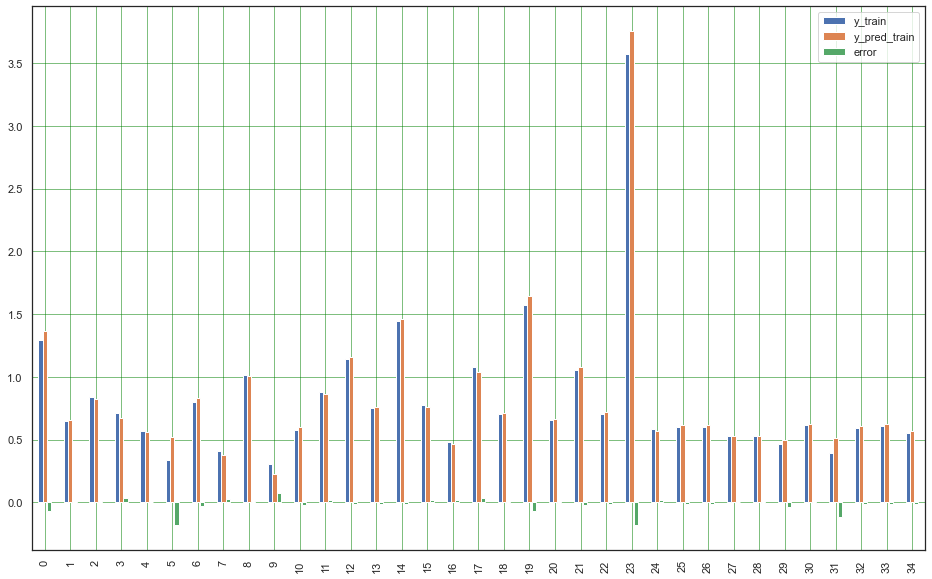

In [580]:
results_lr = results_lr.head(35)
results_lr.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [581]:
pred_final = pipeline_lr.predict(X_test)

In [582]:
meanerror_lr=np.mean(results_lr.error)
meanerror_lr

-0.017118101693194786

In [583]:
df_pred = pd.DataFrame({'consume': pred_final})
df_pred['id'] = df_pred.index
df_pred=df_pred.set_index('id')
df_pred

,consume
id,
0,0.644653
1,0.554524
2,1.231013
3,0.662338
4,0.512779
...,...
65,0.773317
66,0.670450
67,1.802453


In [584]:
df_pred.to_csv('../reto_data/outputs/lr.csv')

### pipeline kn

In [585]:
pred = pipeline_kn.predict(X_train)
print(pipelines[i],"R^2:",metrics.r2_score(y_train, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_train, pred))*(len(y_train)-1)/(len(y_train)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_train, pred))
print("MSE:",metrics.mean_squared_error(y_train, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, pred)))

Pipeline(steps=[('scalar8', StandardScaler()),
                ('rf_classifier', GradientBoostingRegressor())]) R^2: 0.8836213486911326
Adjusted R^2: 0.8797276391677876
MAE: 0.11585992831541216
MSE: 0.031943969462365586
RMSE: 0.17872875947190364


In [586]:
results_kn = pd.DataFrame(zip( y_train, pred, y_train - pred), columns = [ 'y_train','y_pred_train', 'error'])
results_kn.head(10)

,y_train,y_pred_train,error
0,1.2915,0.95976,0.33174
1,0.6519,0.65038,0.00152
2,0.8360,0.84794,-0.01194
3,0.7093,0.42464,0.28466
4,0.5664,0.61854,-0.05214
5,0.3381,0.72774,-0.38964
6,0.7995,0.70648,0.09302
7,0.4067,0.47320,-0.06650
8,1.0128,1.15570,-0.14290
9,0.3034,0.42464,-0.12124


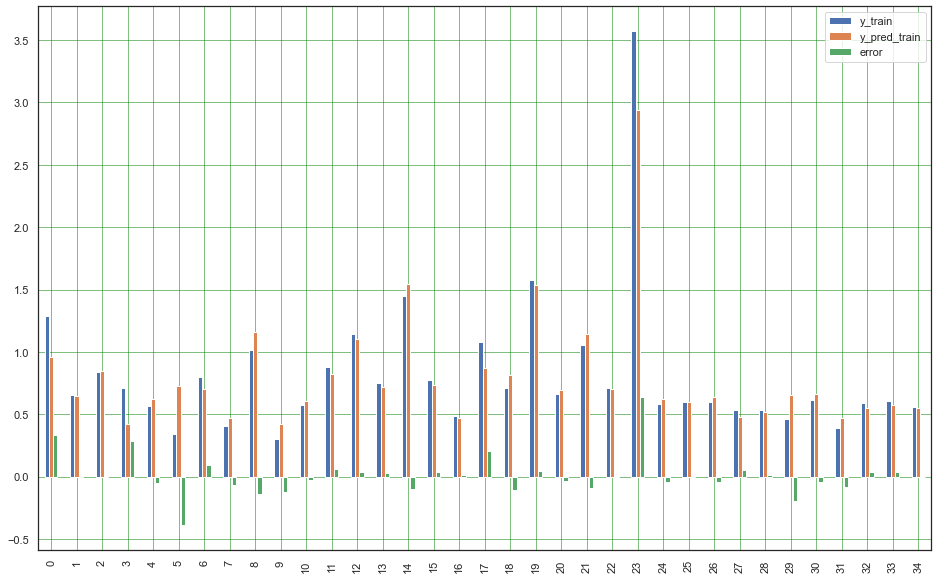

In [587]:
results_kn = results_kn.head(35)
results_kn.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [588]:
pred_final = pipeline_lr.predict(X_test)

In [589]:
meanerror_kn=np.mean(results_kn.error)
meanerror_kn

0.011010857142857142

In [590]:
df_pred = pd.DataFrame({'consume': pred_final})
df_pred['id'] = df_pred.index
df_pred=df_pred.set_index('id')
df_pred

,consume
id,
0,0.644653
1,0.554524
2,1.231013
3,0.662338
4,0.512779
...,...
65,0.773317
66,0.670450
67,1.802453


In [591]:
df_pred.to_csv('../reto_data/outputs/kn.csv')

### pipeline xgbr

In [592]:
pred = pipeline_xgbr.predict(X_train)
print(pipelines[i],"R^2:",metrics.r2_score(y_train, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_train, pred))*(len(y_train)-1)/(len(y_train)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_train, pred))
print("MSE:",metrics.mean_squared_error(y_train, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, pred)))

Pipeline(steps=[('scalar8', StandardScaler()),
                ('rf_classifier', GradientBoostingRegressor())]) R^2: 0.9993674801009855
Adjusted R^2: 0.9993463177251821
MAE: 0.009869758098748365
MSE: 0.0001736160035471743
RMSE: 0.013176342570955504


In [593]:
results_xgbr = pd.DataFrame(zip( y_train, pred, y_train - pred), columns = [ 'y_train','y_pred_train', 'error'])
results_xgbr.head(10)

,y_train,y_pred_train,error
0,1.2915,1.293343,-0.001843
1,0.6519,0.660147,-0.008247
2,0.8360,0.829307,0.006693
3,0.7093,0.735015,-0.025715
4,0.5664,0.555447,0.010953
5,0.3381,0.340216,-0.002116
6,0.7995,0.785016,0.014484
7,0.4067,0.427782,-0.021082
8,1.0128,1.035999,-0.023199
9,0.3034,0.302800,0.000600


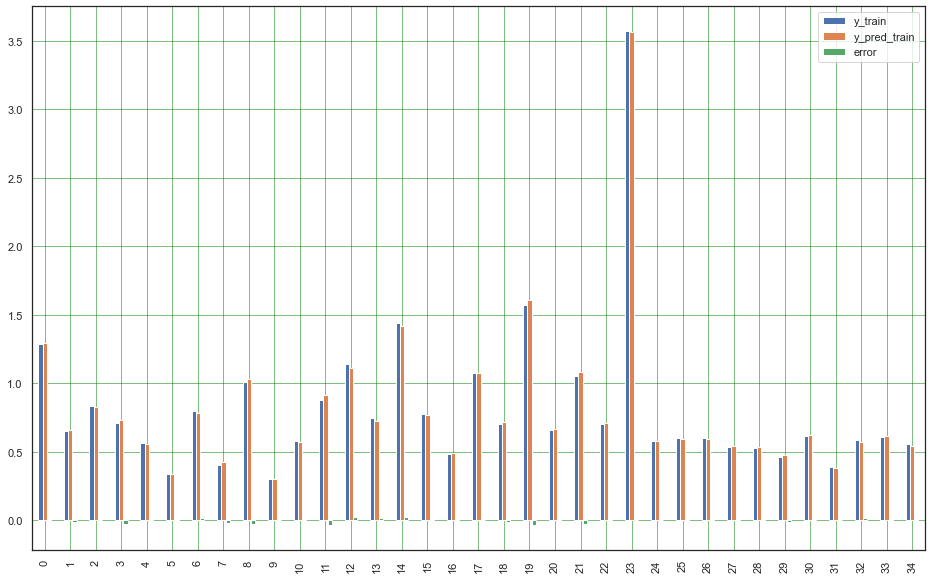

In [594]:
results_xgbr = results_xgbr.head(35)
results_xgbr.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [595]:
pred_final =  pipeline_xgbr.predict(X_test)

In [596]:
meanerror_xgbr=np.mean(results_xgbr.error)
meanerror_xgbr

-0.0018557211348477257

In [597]:
df_pred = pd.DataFrame({'consume': pred_final})
df_pred['id'] = df_pred.index
df_pred=df_pred.set_index('id')
df_pred

,consume
id,
0,0.642547
1,0.542795
2,1.128493
3,0.693970
4,0.530295
...,...
65,0.748831
66,0.653880
67,1.799503


In [598]:
df_pred.to_csv('../reto_data/outputs/xgbr.csv')

### data frame errores medios

In [599]:
df = pd.DataFrame([[meanerror_xgbr, meanerror_kn, meanerror_rf, meanerror_lr, meanerror_xgb, meanerror_ridge]], 
                  columns=['xgbr','kn','rf','lr','xgb','ridge']).T
df

,0
xgbr,-0.001856
kn,0.011011
rf,0.005029
lr,-0.017118
xgb,-0.000248
ridge,-0.016882


### Exporting best model

In [600]:
import pickle

In [605]:
#Saving the Model
pickle_out = open("../reto_data/outputs/xgb.pkl", "wb") 
pickle.dump(pipeline_xgb, pickle_out) 
pickle_out.close()

In [606]:
df_train.to_excel("../reto_data/outputs/clean_df.xls")

In [607]:
df=pd.read_excel("../reto_data/outputs/clean_df.xls")

In [608]:
df.head()

,Unnamed: 0,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume_100Km
0,0,28.0,5.0,26,21.5,12,0,0,0,0,1.4000
1,1,12.0,4.2,30,21.5,13,0,0,0,0,0.5040
2,2,11.2,5.5,38,21.5,15,0,0,0,0,0.6160
3,3,12.9,3.9,36,21.5,14,0,0,0,0,0.5031
4,4,18.5,4.5,46,21.5,15,0,0,0,0,0.8325


### Conclusiones_


In [649]:
(df_train.corr())*100

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume_100Km
distance,100.000000,-12.896676,56.229882,7.517823,8.817534,-5.341141,-2.573817,-1.979065,8.111981,99.210074
consume,-12.896676,100.000000,-22.786618,-16.062288,-32.081059,-1.532697,9.659140,24.811771,-17.066738,-5.218780
speed,56.229882,-22.786618,100.000000,5.929296,1.541101,-9.736041,-3.540800,0.948946,8.161828,55.184655
temp_inside,7.517823,-16.062288,5.929296,100.000000,35.950042,1.019767,29.737625,-3.693724,24.224794,6.237325
temp_outside,8.817534,-32.081059,1.541101,35.950042,100.000000,14.870501,16.756227,-18.631489,34.690341,3.787710
gas_type,-5.341141,-1.532697,-9.736041,1.019767,14.870501,100.000000,10.528540,6.032819,2.276096,-5.534834
AC,-2.573817,9.659140,-3.540800,29.737625,16.756227,10.528540,100.000000,24.291471,8.859801,-1.870021
rain,-1.979065,24.811771,0.948946,-3.693724,-18.631489,6.032819,24.291471,100.000000,-11.264999,0.912464
sun,8.111981,-17.066738,8.161828,24.224794,34.690341,2.276096,8.859801,-11.264999,100.000000,6.424729
consume_100Km,99.210074,-5.218780,55.184655,6.237325,3.787710,-5.534834,-1.870021,0.912464,6.424729,100.000000


* El mejor modelo de prediccion es XGB. Diferentes variables afectan al consumo: velocidad, distancia por supuesto. En cuanto al tipo de combustible, solo afecta un 5,53% al precio.

In [645]:
#SP98
gas_type.get_group(1).mean()

distance         18.639912
consume           4.899123
speed            40.820175
temp_inside      21.938007
temp_outside     12.228070
gas_type          1.000000
AC                0.100877
rain              0.140351
sun               0.087719
consume_100Km     0.883618
dtype: float64

In [646]:
#E10
gas_type.get_group(0).mean()

distance         21.096250
consume           4.931250
speed            43.506250
temp_inside      21.917429
temp_outside     10.118750
gas_type          0.000000
AC                0.043750
rain              0.100000
sun               0.075000
consume_100Km     1.008933
dtype: float64

In [644]:
gas_type.agg({'consume_100Km':'mean','speed':'mean','distance':'mean' })

,consume_100Km,speed,distance
gas_type,,,
0,1.008933,43.506250,21.096250
1,0.883618,40.820175,18.639912


* El consumo de E10es superior pero también la velocidad y la distancia.